<a href="https://colab.research.google.com/github/Tayen15/machine-learning-task/blob/main/tugas06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum06/data/Predict Hair Fall.csv')

df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough' # Keep other columns (numerical)
)

# Create a pipeline for preprocessing and scaling
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False))]) # Use with_mean=False for sparse matrix output of OneHotEncoder

# Apply preprocessing and scaling
X_processed = pipeline.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.44      0.65      0.52        89
           1       0.54      0.32      0.40       111

    accuracy                           0.47       200
   macro avg       0.49      0.49      0.46       200
weighted avg       0.49      0.47      0.46       200



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')

# Train the model using the processed and split training data
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the processed test data
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.65      0.52        89
           1       0.54      0.32      0.40       111

    accuracy                           0.47       200
   macro avg       0.49      0.49      0.46       200
weighted avg       0.49      0.47      0.46       200



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test)

# Optional: Transform training data as well if you want to visualize it
# X_train_pca = pca.transform(X_train)

Text(0.5, 0.92, '3D PCA of Test Data Colored by Actual Diagnosis')

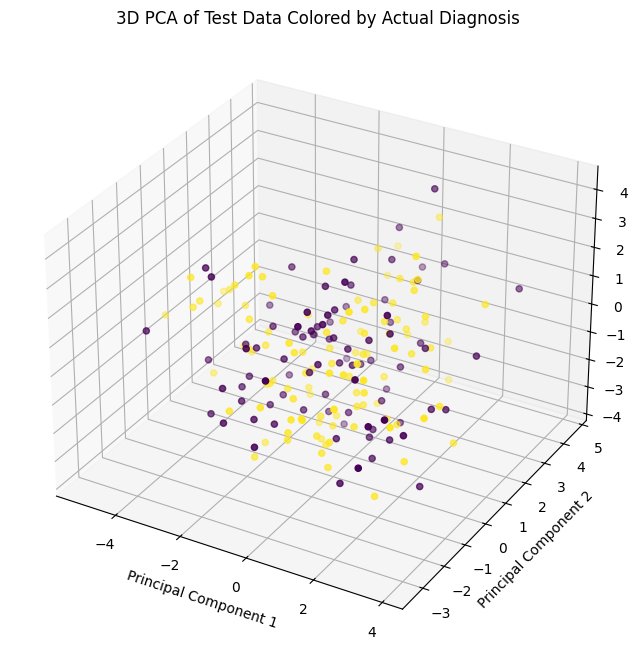

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the original y_test for coloring
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_test, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Test Data Colored by Actual Diagnosis')

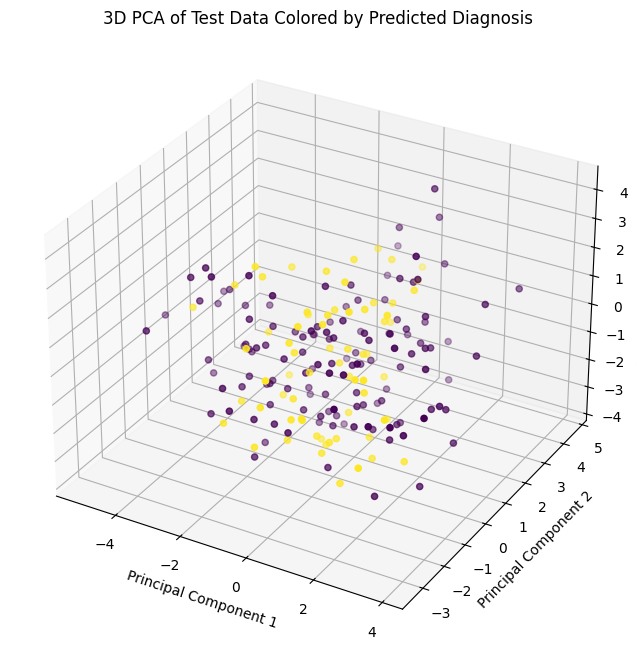

In [ ]:
fig_pred = plt.figure(figsize=(10, 8))
ax_pred = fig_pred.add_subplot(111, projection='3d')

# Use the predicted y_pred for coloring
ax_pred.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_pred, cmap='viridis')

ax_pred.set_xlabel('Principal Component 1')
ax_pred.set_ylabel('Principal Component 2')
ax_pred.set_zlabel('Principal Component 3')
ax_pred.set_title('3D PCA of Test Data Colored by Predicted Diagnosis')

plt.show()